In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import plotly.express as px


sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)


In [4]:
# --- Load Data ---
country = "benin-malanville"  
data_path = f"../data/{country}.csv"

df = pd.read_csv(data_path)

# Show first 5 rows
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [5]:
# --- Basic Info ---
print("Shape:", df.shape)
df.info()


display(df.describe())

missing = df.isna().sum().sort_values(ascending=False)
print("Missing values:\n", missing)
print("\nColumns with >5% missing:\n", missing[missing > 0.05 * len(df)])


Shape: (525600, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB    

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


Missing values:
 Comments         525600
GHI                   0
Timestamp             0
DNI                   0
DHI                   0
ModB                  0
ModA                  0
RH                    0
WS                    0
WSgust                0
Tamb                  0
WSstdev               0
WD                    0
BP                    0
WDstdev               0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64

Columns with >5% missing:
 Comments    525600
dtype: int64


In [ ]:
# Columns to check for outliers
key_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[key_cols], nan_policy='omit'))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outlier rows detected: {outliers.sum()}")


df_clean = df[~outliers].copy()

# Impute remaining missing values in key columns with median
df_clean[key_cols] = df_clean[key_cols].fillna(df_clean[key_cols].median())


df_clean.to_csv(f"../data/{country}_clean.csv", index=False)
print(f"Cleaned data saved to ../data/{country}_clean.csv")


Number of outlier rows detected: 7740
Cleaned data saved to ../data/benin-malanville_clean.csv


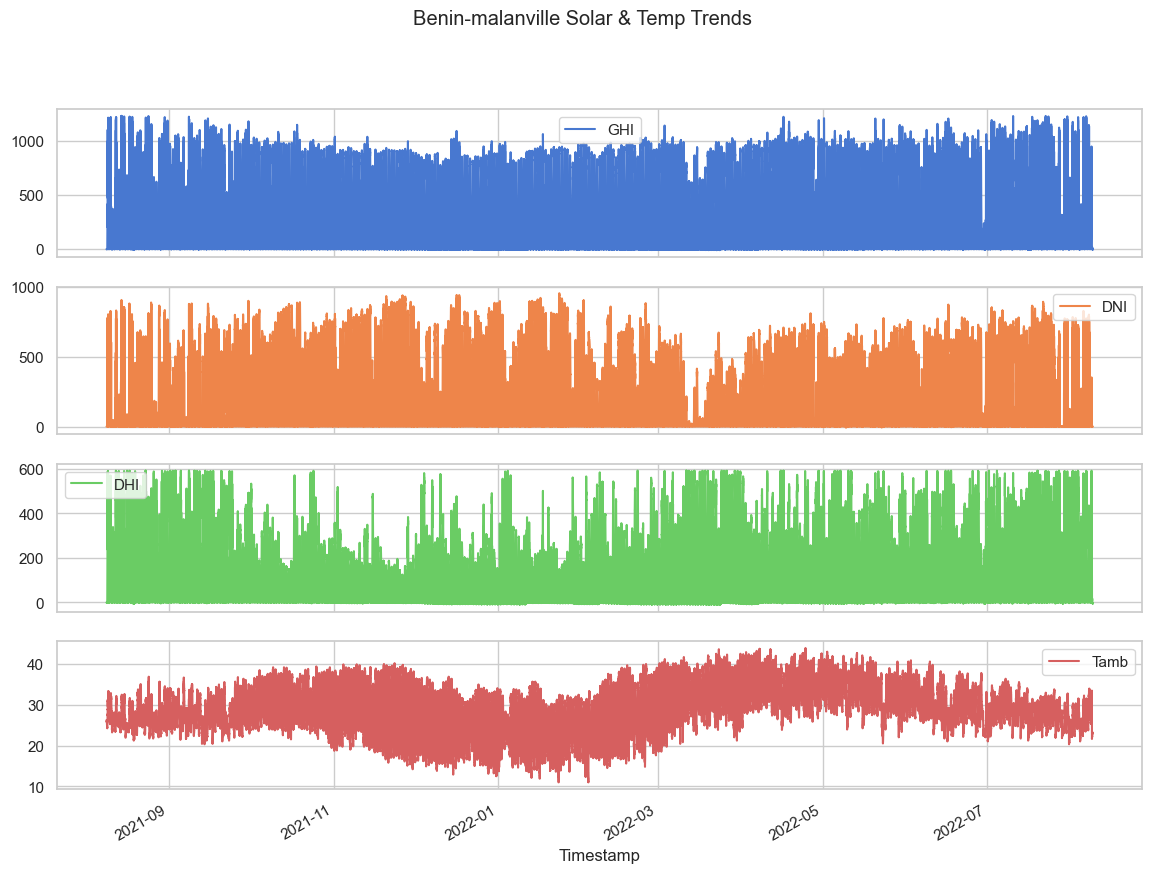

In [7]:
# Convert timestamp to datetime
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)

# Plot time series for solar radiation and temperature
cols_to_plot = ["GHI", "DNI", "DHI", "Tamb"]
df_clean[cols_to_plot].plot(subplots=True, figsize=(14,10), title=f"{country.capitalize()} Solar & Temp Trends")
plt.show()


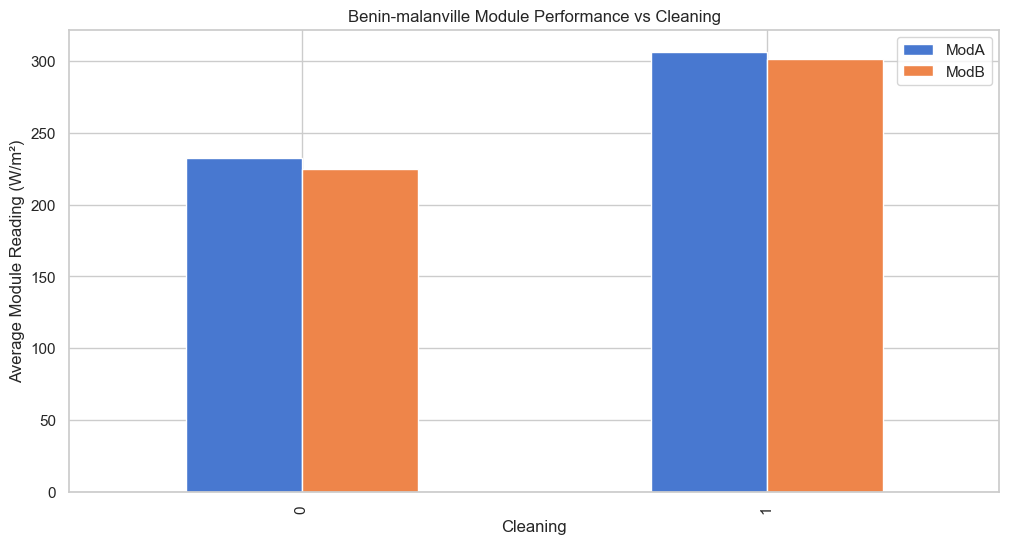

In [8]:
# Average module readings pre/post-clean
clean_avg = df_clean.groupby("Cleaning")[["ModA", "ModB"]].mean()
clean_avg.plot(kind="bar", title=f"{country.capitalize()} Module Performance vs Cleaning")
plt.ylabel("Average Module Reading (W/m²)")
plt.show()


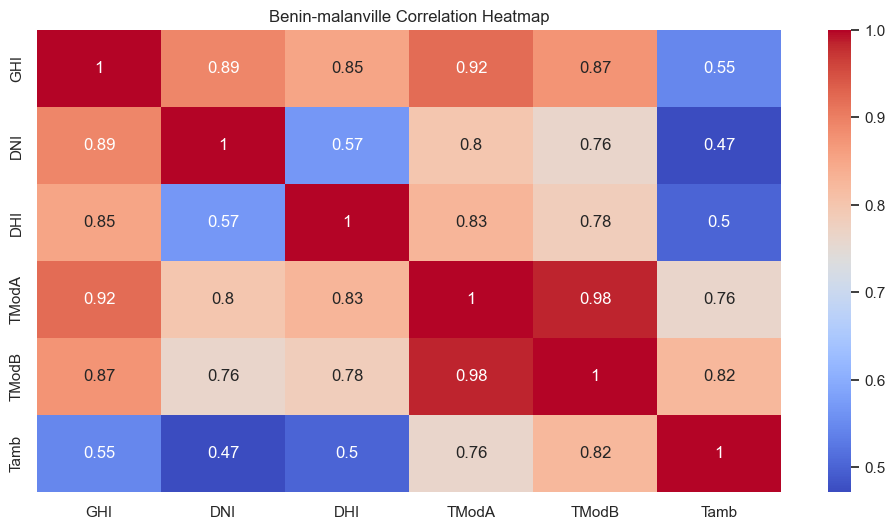

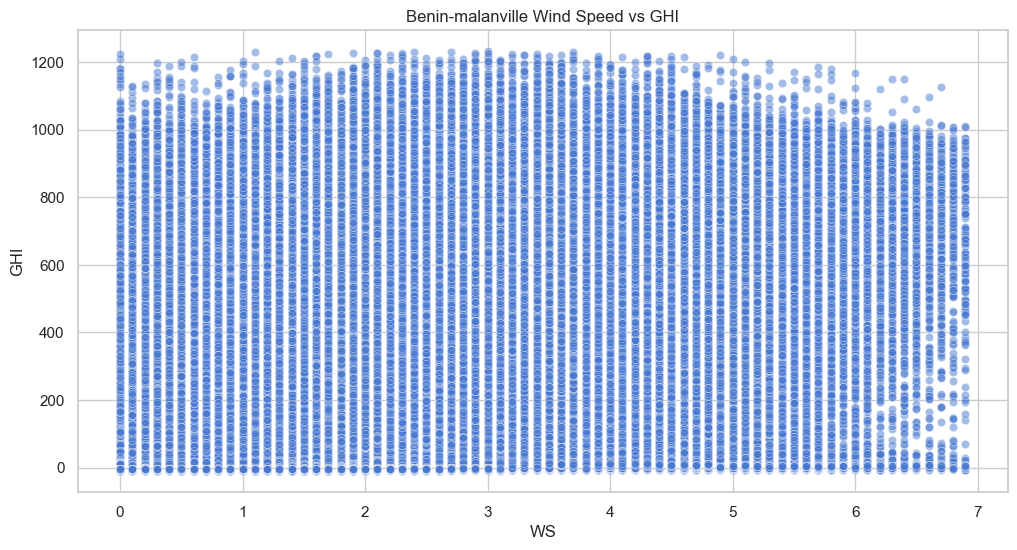

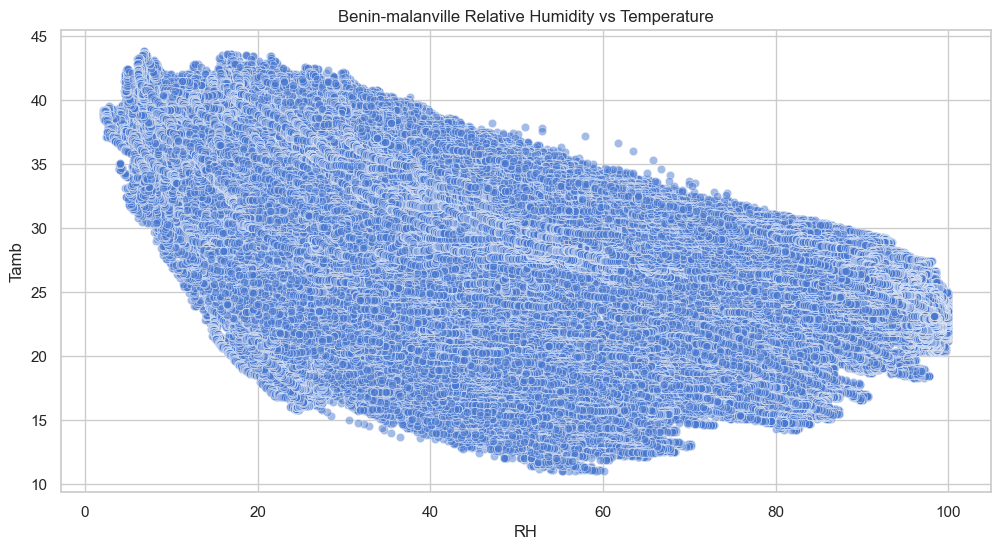

In [9]:
# Correlation heatmap
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB", "Tamb"]
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title(f"{country.capitalize()} Correlation Heatmap")
plt.show()

# Scatter plots examples
sns.scatterplot(data=df_clean, x="WS", y="GHI", alpha=0.5)
plt.title(f"{country.capitalize()} Wind Speed vs GHI")
plt.show()

sns.scatterplot(data=df_clean, x="RH", y="Tamb", alpha=0.5)
plt.title(f"{country.capitalize()} Relative Humidity vs Temperature")
plt.show()


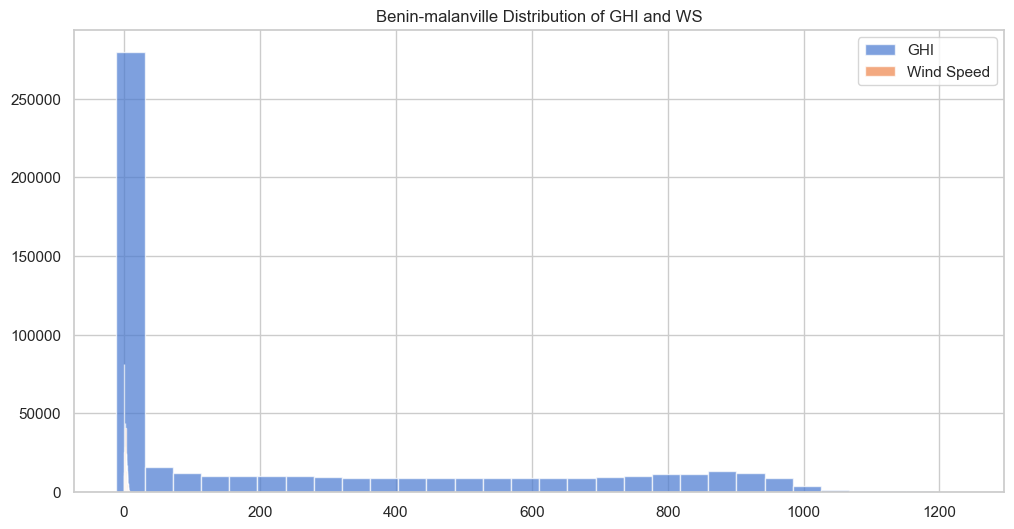

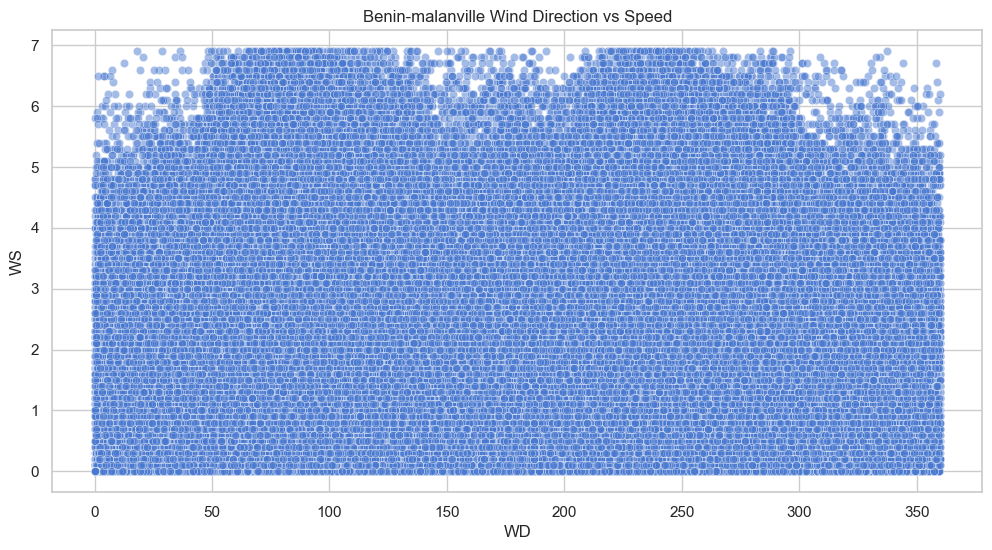

In [10]:
# Histogram of GHI
df_clean["GHI"].hist(bins=30, alpha=0.7, label="GHI")
df_clean["WS"].hist(bins=30, alpha=0.7, label="Wind Speed")
plt.legend()
plt.title(f"{country.capitalize()} Distribution of GHI and WS")
plt.show()

# Wind direction vs speed scatter
sns.scatterplot(data=df_clean, x="WD", y="WS", alpha=0.5)
plt.title(f"{country.capitalize()} Wind Direction vs Speed")
plt.show()


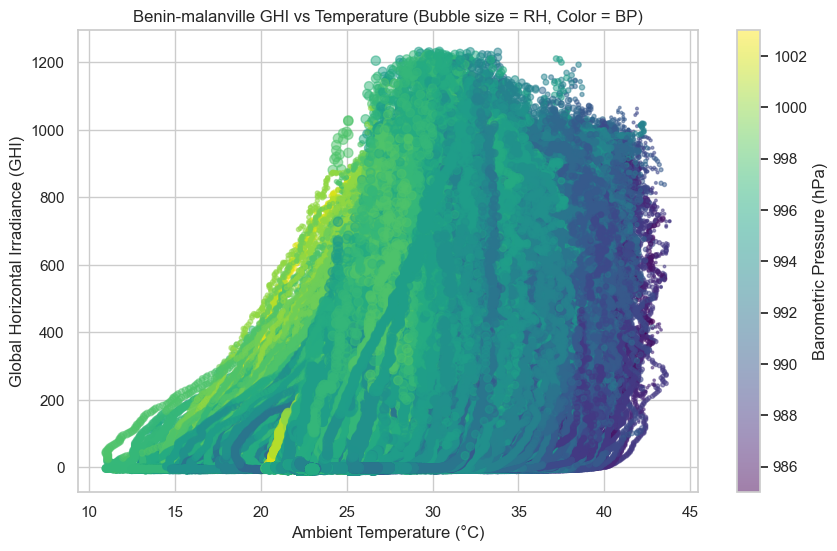

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(df_clean["Tamb"], df_clean["GHI"], 
            s=df_clean["RH"]*0.5, alpha=0.5, c=df_clean["BP"], cmap="viridis")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (GHI)")
plt.title(f"{country.capitalize()} GHI vs Temperature (Bubble size = RH, Color = BP)")
plt.colorbar(label="Barometric Pressure (hPa)")
plt.show()
